<a href="https://colab.research.google.com/github/tuhanren/Airbnb-Data-Analysis/blob/main/Final_Project_Group15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Objective:

The goal of this project is to help new Airbnb hosts estimate a reasonable nightly **rental price** for their property. Using historical data from Airbnb listings, we will build predictive models that consider factors such as **location(lat and long)**, **availability**, and **house rules?(50k missing)** to forecast the most suitable rental price for new listings.

Dataset: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata/dataLinks to an external site.

Data dictionary: https://docs.google.com/spreadsheets/d/1b_dvmyhb_kAJhUmv81rAxl4KcXn0Pymz


Key Analysis Steps:

1. Data Cleaning: Clean the dataset by handling missing values, fixing inconsistencies, and addressing any outliers.
2. Descriptive Analytics: Explore the overall distribution of rental prices, relationships between location and price, popular room types and other descriptive insights.
3. Diagnostic Analytics: Perform correlation analysis and regression to find which factors (location, room type, availability, etc.) most influence rental prices.
4. Predictive Analytics: Build models that predict rental prices based on property characteristics and availability.

Practical Use Case:
New hosts will be able to input their property’s details, such as location, room type, availability, etc. Our model will then predict a reasonable nightly rental price based on similar listings from the historical data, helping the host price their property competitively.

Feasibility:
This project is feasible using Python libraries like pandas for data handling, scikit-learn and keras for modeling, and matplotlib for visualization. The final result will not only provide price recommendations for new Airbnb hosts but also reveal market trends and insights.

In [1]:
# Import the 'drive' module from the 'google.colab' package to enable Google Drive integration.
# Then, mount Google Drive to the '/drive' directory within the Colab environment.
# The 'force_remount=True' parameter ensures that the Drive is remounted even if it was previously mounted.

from google.colab import drive
drive.mount('/drive', force_remount=True)

# Change the current working directory to the specified folder within Google Drive,
# where you can save and load your Colab notebooks or files.
%cd '/drive/MyDrive/Colab Notebooks/INF1340/group project/'

Mounted at /drive
/drive/MyDrive/Colab Notebooks/INF1340/group project


# **Functions and Packages**

In [209]:
import pandas as pd
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
import math

def read_csv(uri: str) -> pd.DataFrame:
  """Read a CSV file from the given URI and return a pandas DataFrame.

  Args:
    uri: The URI of the CSV file to read.

  Returns:
    A pandas DataFrame containing the data from the CSV file.
  """

  try:
    return pd.read_csv(uri)
  except FileNotFoundError as ex:
    print(f'Error! File Not Found! uri={uri}')
    raise ex

def columns_snakecase(dataFrame: pd.DataFrame) -> None:
  """
  Convert column names in a pandas DataFrame to lowercase and
  replace all spaces with underscores e.g. 'My Column Name' becomes 'my_column_name'.

  Args:
    dataFrame: The pandas DataFrame whose column names need to be converted.
  """

  dataFrame.columns = dataFrame.columns.str.lower().str.replace(' ', '_')

def columns_drop(dataFrame: pd.DataFrame, columns: list) -> None:
  """Drop the specified columns from a pandas DataFrame.

  Args:
    dataFrame: The pandas DataFrame from which columns need to be dropped.
    columns: A list of column names to be dropped from the DataFrame.
  """
  dataFrame.drop(columns, axis=1, inplace=True)

def columns_drop_by_null_percentage(
    dataFrame: pd.DataFrame,
    percentage_threshold: float
) -> None:
  """"""

  columns = dataFrame.columns[dataFrame.isnull().mean() > percentage_threshold]
  print(f"Droping: {columns}")
  columns_drop(dataFrame, columns)

def columns_fill_null(dataFrame: pd.DataFrame, columns: list, value: any) -> None:
  """
  Fill missing values in the specified columns of a pandas DataFrame with a given value.

  Args:
    dataFrame: The pandas DataFrame in which missing values need to be filled.
    columns: A list of column names whose missing values need to be filled.
    value: The value to fill missing values with.
  """

  for column in columns:
    dataFrame[column].fillna(value, inplace=True)

def columns_dollarize(dataFrame: pd.DataFrame, columns: list) -> None:
  """
  Convert values in the specified columns of a pandas DataFrame from string to float
  by removing dollar signs and commas.

  Args:
    dataFrame: The pandas DataFrame in which values need to be converted.
    columns: A list of column names whose values need to be converted.
  """

  for column in columns:
    dataFrame[column] = dataFrame[column].replace('[\$,]', '', regex=True).astype(float)

def rows_drop_by_condition(dataFrame: pd.DataFrame, condition: any) -> None:
  """
  Drop rows from a pandas DataFrame based on a given condition.

  Args:
    dataFrame: The pandas DataFrame from which rows need to be dropped.
    condition: A pandas DataFrame condition to filter rows.
  """

  dataFrame.drop(dataFrame[condition].index, inplace=True)

def rows_drop_by_null(dataFrame: pd.DataFrame, columns: list) -> None:
  """
  Drop rows from a pandas DataFrame that contain missing values in the specified columns.

  Args:
    dataFrame: The pandas DataFrame from which rows need to be dropped.
    columns: A list of column names whose rows need to be dropped.
  """
  dataFrame.dropna(subset=columns, inplace=True)

def columns_lowercase(dataFrame: pd.DataFrame, columns: list) -> None:
  """
  Convert column names in a pandas DataFrame to lowercase.

  Args:
    dataFrame: The pandas DataFrame whose columns need to be converted.
    columns: A list of column names to be converted to categorical data type.
  """

  for column in columns:
    dataFrame[column] = dataFrame[column].str.lower()

def columns_categorize(dataFrame: pd.DataFrame, columns: list) -> None:
  """
  Convert the specified columns of a pandas DataFrame to categorical data type.

  Args:
    dataFrame: The pandas DataFrame whose columns need to be converted.
    columns: A list of column names to be converted to categorical data type.
  """

  for column in columns:
    dataFrame[column] = dataFrame[column].astype('category')

def columns_boolize(dataFrame: pd.DataFrame, columns: list) -> None:
  """
  Convert the specified columns of a pandas DataFrame to boolean data type.

  Args:
    dataFrame: The pandas DataFrame whose columns need to be converted.
    columns: A list of column names to be converted to boolean data type.
  """

  for column in columns:
    dataFrame[column] = dataFrame[column].astype(bool)

def columns_intize(dataFrame: pd.DataFrame, columns: list) -> None:
  """
  Convert the specified columns of a pandas DataFrame to integer data type.

  Args:
    dataFrame: The pandas DataFrame whose columns need to be converted.
    columns: A list of column names to be converted to integer data type.
  """

  for column in columns:
    dataFrame[column] = dataFrame[column].astype(int)

def columns_floatize(dataFrame: pd.DataFrame, columns: list) -> None:
  """
  Convert the specified columns of a pandas DataFrame to float data type.

  Args:
    dataFrame: The pandas DataFrame whose columns need to be converted.
    columns: A list of column names to be converted to float data type.
  """

  for column in columns:
    dataFrame[column] = dataFrame[column].astype(float)

def apply_lambda(dataFrame: pd.DataFrame, columns: list, fn: any) -> None:
  """
  Apply a lambda function to the specified columns of a pandas DataFrame.

  Args:
    dataFrame: The pandas DataFrame on which the lambda function needs to be applied.
    columns: A list of column names whose values need to be transformed.
    fn: The lambda
  """

  for column in columns:
    dataFrame[column] = dataFrame[column].apply(fn)

################################ Descriptive Analytics Start ################################
def calculate_summary_statistics(dataFrame: pd.DataFrame) -> pd.DataFrame:
  """
  Compute custom summary statistics for all numerical columns in a DataFrame
  and return the results as a new DataFrame.

  Args:
    dataFrame: pd.DataFrame (pd.DataFrame): Input DataFrame.

  Returns:
    pd.DataFrame: DataFrame containing summary statistics for numerical columns.
  """
  # List to store statistics for each column
  stats_list = []
  # Iterate over numerical columns
  for column in df.select_dtypes(include=['number']).columns:
    stats = {
      "Column": column,
      "Mean": df[column].mean(),
      "Median": df[column].median(),
      "Mode": df[column].mode().iloc[0] if not df[column].mode().empty else None,
      "Std Dev": df[column].std(),
      "Min": df[column].min(),
      "Max": df[column].max(),
      "Count": df[column].count(),
      "Missing Values": df[column].isnull().sum()
    }
    stats_list.append(stats)
  # Convert list of stats dictionaries to a DataFrame
  stats_df = pd.DataFrame(stats_list)
  stats_df.set_index("Column", inplace=True)
  return stats_df

def explore_distribution(dataFrame: pd.DataFrame) -> pd.DataFrame:
  """
  Explore and describe the distribution of numerical data in a DataFrame
  using skewness and kurtosis, along with annotations for distribution types.

  Args:
      dataFrame (pd.DataFrame): The input DataFrame containing numerical data.

  Returns:
      pd.DataFrame: A DataFrame containing summary statistics and annotations for the distribution.
  """
  skewness_kurt_list = []

  # Iterate over numerical columns
  for column in df.select_dtypes(include=['number']).columns:
    column_data = df[column].dropna()  # Drop missing values for calculations
    skewness = skew(column_data)
    kurt = kurtosis(column_data, fisher=False)  # Pearson kurtosis
    # Annotate skewness
    if skewness > 0:
      skewness_description = "Right-skewed"
    elif skewness < 0:
      skewness_description = "Left-skewed"
    else:
      skewness_description = "Symmetric"
    # Annotate kurtosis
    if kurt > 3:
      kurtosis_description = "Leptokurtic (heavy tails)"
    elif kurt < 3:
      kurtosis_description = "Platykurtic (light tails)"
    else:
      kurtosis_description = "Mesokurtic (normal tails)"
    # Create a stats dictionary
    stats = {
      "Column": column,
      "Skewness": skew(column_data),  # Calculate skewness
      "Skewness Description": skewness_description,
      "Kurtosis": kurtosis(column_data, fisher=False),  # Calculate kurtosis (Pearson definition)
      "Kurtosis Description": kurtosis_description,
    }
    skewness_kurt_list.append(stats)

  # Create a summary DataFrame
  skewness_kurt_df = pd.DataFrame(skewness_kurt_list)
  skewness_kurt_df.set_index("Column", inplace=True)
  return skewness_kurt_df

def calculate_missing_proportion(dataFrame: pd.DataFrame) -> pd.DataFrame:
  """
  Identify and calculate the proportion of missing values for each variable.

  Args:
    dataFrame (pd.DataFrame): The input DataFrame.

  Returns:
    pd.DataFrame: A DataFrame containing the variable names, missing count, and missing proportion.
  """
  # Calculate the count of missing values for each column
  missing_count = dataFrame.isnull().sum()
  # Calculate the proportion of missing values
  missing_proportion = missing_count / len(dataFrame)
  # Combine results into a DataFrame
  missing_stats = pd.DataFrame({
    'Variable': missing_count.index,
    'Missing Count': missing_count.values,
    'Proportion Missing (%)': missing_proportion.values * 100
  })
  # Sort by the proportion of missing values in descending order
  missing_stats = missing_stats.sort_values(by='Proportion Missing (%)', ascending=False).reset_index(drop=True)
  return missing_stats

def generate_frequency_distributions(dataFrame: pd.DataFrame, include_bool: bool=True) -> dict:
  """
  Generate frequency distributions for all categorical columns in a DataFrame.

  Args:
    dataFrame (pd.DataFrame): The input DataFrame.
    include_bool (bool): Whether to include boolean columns in the analysis.

  Returns:
    dict: A dictionary containing frequency distributions for each categorical column.
  """
  # Determine the column types to include
  dtypes_to_include = ['object', 'category']
  if include_bool:
    dtypes_to_include.append('bool')
  # Identify categorical columns
  categorical_columns = dataFrame.select_dtypes(include=dtypes_to_include).columns
  # Initialize a dictionary to store frequency distributions
  frequency_distributions = {}
  # Loop through each categorical column and calculate the frequency distribution
  for column in categorical_columns:
    frequency_distribution = dataFrame[column].value_counts().reset_index()
    frequency_distribution.columns = [column, 'Frequency']
    frequency_distributions[column] = frequency_distribution
  return frequency_distributions

# Function to plot frequency distributions in a grid layout
def plot_frequency_grid(freq_distributions, cols_per_row=3, chart_type='bar') -> None:
  """
  Plots frequency distributions in a grid layout.

  Args:
    freq_distributions (dict): Dictionary of frequency DataFrames.
    cols_per_row (int): Number of columns in each row of the grid.
    chart_type (str): Type of chart to plot ('bar' or 'pie').
  """
  num_plots = len(freq_distributions)  # Total number of plots
  rows = math.ceil(num_plots / cols_per_row)  # Calculate the number of rows
  # Create a grid of subplots
  fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 5 * rows))
  axes = axes.flatten()  # Flatten axes array for easy iteration
  # Iterate through each column and its frequency distribution
  for idx, (col, freq_df) in enumerate(freq_distributions.items()):
    ax = axes[idx]
    freq_df.plot(
      x=col,
      y="Frequency",
      kind=chart_type,
      title=f"Frequency of {col}",
      ax=ax,
      legend=False
    )
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
  # Hide unused subplots if any
  for idx in range(len(freq_distributions), len(axes)):
    axes[idx].axis("off")
  plt.tight_layout()
  plt.show()

def group_price_analysis(dataFrame: pd.DataFrame, group_col: str) -> pd.DataFrame:
  """
  Generalized function for analyzing the relationship between a specified group column and price statistics.
  Calculates average, median, and standard deviation of prices, and visualizes the average price by the group column.

  Args:
    dataFrame (pd.DataFrame): The input DataFrame containing the specified group_col and 'price'.
    group_col (str): The name of the column to group by for analysis.

  Returns:
    pd.DataFrame: A pivot table summarizing average, median, and standard deviation of prices for each group in group_col.
  """
  if group_col not in dataFrame.columns:
    raise ValueError(f"The specified group_column '{group_col}' is not found in the DataFrame.")
  # Generate pivot table for price statistics
  pivot_table = dataFrame.pivot_table(
    values='price',
    index=group_col,
    aggfunc=['mean', 'median', 'std'],
    observed=False
  ).reset_index()
  # Rename columns for clarity
  pivot_table.columns = [group_col, 'Average Price', 'Median Price', 'Price Std Dev']
  # Plot the average price
  plt.figure()
  sns.barplot(
    data=pivot_table,
    x=group_col,
    y='Average Price',
    hue=group_col,  # Assign `x` to `hue`
    legend=False  # Disable redundant legend
  )
  plt.title(f"Average Price by {group_col.capitalize()}", fontsize=14)
  plt.xlabel(group_col.capitalize(), fontsize=12)
  plt.ylabel("Average Price", fontsize=12)
  plt.xticks(rotation=45, fontsize=10)
  plt.tight_layout()
  plt.show()
  return pivot_table

def group_year_price_analysis(dataFrame: pd.DataFrame, group_col: str) -> pd.DataFrame:
  """
  Analyze the relationship between a specified group column and construction year groups
  in terms of average price. This function segments construction years into 5-year groups,
  calculates average prices for each group and construction year group, and visualizes the results.

  Args:
    dataFrame (pd.DataFrame): The input DataFrame containing columns 'construction_year', the specified group column, and 'price'.
    group_col (str): The column name to group by (e.g., 'neighbourhood_group', 'neighbourhood', etc.).

  Returns:
    pd.DataFrame: A pivot table containing average prices for each group and construction year group.
  """
  # 1. Get the minimum and maximum construction years
  max_year = dataFrame['construction_year'].max()
  min_year = dataFrame['construction_year'].min()
  # 2. Generate boundaries of 5-year segments and corresponding labels
  bins = list(range(min_year, max_year + 6, 5))
  labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins) - 1)]
  # 3. Group construction_year into 5-year intervals
  dataFrame['construction_year_group'] = pd.cut(
    dataFrame['construction_year'], bins=bins, labels=labels, right=False
  )
  # 4. Create a pivot table to calculate average prices
  df_pivot = dataFrame.pivot_table(
    values='price',
    index=group_col,
    columns='construction_year_group',
    aggfunc='mean',
    observed=False
  )
  # 5. Plot the pivot table as a horizontal bar chart
  plt.figure()
  df_pivot.plot(kind='barh', legend=True)
  plt.title(f"Average Price by {group_col.capitalize()} and Construction Year Group")
  plt.xlabel("Average Price")
  plt.ylabel(group_col.capitalize())
  plt.legend(title="Construction Year Group", bbox_to_anchor=(1, 1.02))
  # plt.tight_layout()  # Ensures the plot fits well
  plt.show()
  return df_pivot

################################ Descriptive Analytics End ################################

# **Load Data and Brief Review**

In [210]:
# Call read_csv() to import csv file.
df = read_csv('Airbnb_Open_Data.csv')
df.head(3)

<ipython-input-209-b8cef505222a>:18: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(uri)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.647490,-73.972370,United States,...,$193,10.000000,9.000000,10/19/2021,0.210000,4.000000,6.000000,286.000000,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.753620,-73.983770,United States,...,$28,30.000000,45.000000,5/21/2022,0.380000,4.000000,2.000000,228.000000,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.809020,-73.941900,United States,...,$124,3.000000,0.000000,NaN,NaN,5.000000,1.000000,352.000000,"I encourage you to use my kitchen, cooking and...",NaN


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [212]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,102599.000000,102599.000000,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,29146234.522130,49254111474.328667,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,16257505.607309,28538996644.374817,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1001254.000000,123600518.000000,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,15085814.500000,24583328475.000000,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,29136603.000000,49117739352.000000,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,43201198.000000,73996495817.000000,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,57367417.000000,98763129024.000000,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [213]:
df.isnull().sum()

,0
id,0
NAME,250
host id,0
host_identity_verified,289
host name,406
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


**Conclusion from the first snapshot of the data (info(), describe() and isnull()):**


1.   Column name format needs to be aligned.
2.   Null values handling.
3.   Dtype adjustment(float, int, date, category, bool, object).

# **Data Cleaning**
*   Load and inspect the dataset, ensuring you understand its structure and data types.
*   Identify and handle missing data (remove, impute, or flag missing values).
*   Detect and handle outliers, if needed.
*   Resolve data inconsistencies (e.g., fix typos or standardize units).
*   Transform and normalize variables if necessary.

***1. Column name format: Rename all columns, to lower.***

In [214]:
columns_snakecase(df)
df.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')

***2. Null values handling.***
*   Drop high missing rate columns (15% or higher)



In [215]:
columns_drop_by_null_percentage(df, 0.15)

Droping: Index(['last_review', 'reviews_per_month', 'house_rules', 'license'], dtype='object')


*   Drop irrelevant columns



In [216]:
irrelevant_to_drop = ['name', 'host_id', 'country', 'country_code',
                   'host_name', 'calculated_host_listings_count']
columns_drop(df, irrelevant_to_drop)

In [217]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      102599 non-null  int64  
 1   host_identity_verified  102310 non-null  object 
 2   neighbourhood_group     102570 non-null  object 
 3   neighbourhood           102583 non-null  object 
 4   lat                     102591 non-null  float64
 5   long                    102591 non-null  float64
 6   instant_bookable        102494 non-null  object 
 7   cancellation_policy     102523 non-null  object 
 8   room_type               102599 non-null  object 
 9   construction_year       102385 non-null  float64
 10  price                   102352 non-null  object 
 11  service_fee             102326 non-null  object 
 12  minimum_nights          102190 non-null  float64
 13  number_of_reviews       102416 non-null  float64
 14  review_rate_number  


*   Fill numeric missing values.
  -  `price`: 247 rows, fill with mean.
  -  `service_fee`:273 rows, fill with 0.0.
  -  `minimum_nights`: 409 rows, fill with 0.
  -  `number_of_reviews`: 183 rows, fill with 0.
  -  `review_rate_number`: 326 rows, fill with 0.
  -  `availability_365`: 448 rows, fill with 0.

*   Fill categorical missing values.
  -  `host_identity_verified`: 289 rows, fill with 'unconfirmed'.
  -  `cancellation_policy`: 76 rows, fill with 'strict'.
*   Fill bool missing values.
  -  `instant_bookable`: 105 rows, fill with `False`.



In [218]:
columns_dollarize(df, ['price', 'service_fee'])
columns_fill_null(df, ['price'], df.groupby(['neighbourhood', 'room_type'])['price'].transform('mean'))
columns_fill_null(df, ['service_fee', 'price', 'minimum_nights', 'number_of_reviews',
                       'review_rate_number', 'availability_365'], 0)
columns_fill_null(df, ['host_identity_verified'], 'unconfirmed')
columns_fill_null(df, ['cancellation_policy'], 'strict')
columns_fill_null(df, ['instant_bookable'], False)

<ipython-input-209-b8cef505222a>:64: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataFrame[column].fillna(value, inplace=True)
<ipython-input-209-b8cef505222a>:64: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame[column].fillna(value, inplace=True)


*   Drop rows of null values. mentioned counts from draft.
  -  `lat` and `long`: 8 rows.
  -  `neighbourhood_group`: 29 rows.
  -  `neighbourhood`: 16 rows.
  -  `construction_year`: 214 rows.
  -  `room_type`.

In [219]:
rows_drop_by_null(df, ['lat', 'long', 'neighbourhood_group', 'neighbourhood', 'construction_year', 'room_type'])

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102338 entries, 0 to 102598
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      102338 non-null  int64  
 1   host_identity_verified  102338 non-null  object 
 2   neighbourhood_group     102338 non-null  object 
 3   neighbourhood           102338 non-null  object 
 4   lat                     102338 non-null  float64
 5   long                    102338 non-null  float64
 6   instant_bookable        102338 non-null  bool   
 7   cancellation_policy     102338 non-null  object 
 8   room_type               102338 non-null  object 
 9   construction_year       102338 non-null  float64
 10  price                   102338 non-null  float64
 11  service_fee             102338 non-null  float64
 12  minimum_nights          102338 non-null  float64
 13  number_of_reviews       102338 non-null  float64
 14  review_rate_number      1

***3. Inconsistency and outliers handling***


*   Convert to lower case for all categorical values.
*   Fix all inconsistent cases.
*   Cast columns to the appropriate types.
*   Handle all outliers.
*   Drop duplicated records.




*   Convert to lower case for all categorical values
  - On columns of `host_identity_verified`, `neighbourhood_group`,`neighbourhood`, `cancellation_policy`, `room_type`.



In [221]:
columns_lowercase(df, ['host_identity_verified', 'neighbourhood_group',
                       'neighbourhood', 'cancellation_policy', 'room_type'])

In [222]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102338 entries, 0 to 102598
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      102338 non-null  int64  
 1   host_identity_verified  102338 non-null  object 
 2   neighbourhood_group     102338 non-null  object 
 3   neighbourhood           102338 non-null  object 
 4   lat                     102338 non-null  float64
 5   long                    102338 non-null  float64
 6   instant_bookable        102338 non-null  bool   
 7   cancellation_policy     102338 non-null  object 
 8   room_type               102338 non-null  object 
 9   construction_year       102338 non-null  float64
 10  price                   102338 non-null  float64
 11  service_fee             102338 non-null  float64
 12  minimum_nights          102338 non-null  float64
 13  number_of_reviews       102338 non-null  float64
 14  review_rate_number      1

In [223]:
# Check inconsistency
df['neighbourhood_group'].value_counts().sort_index()

,count
neighbourhood_group,
bronx,2709
brookln,1
brooklyn,41735
manhatan,1
manhattan,43690
queens,13248
staten island,954


*   Fix all inconsistent cases.
  - `neighbourhood_group`: Case differences of 'manhatan' vs 'Manhattan' and 'brookln' vs 'brooklyn'.



In [224]:
df.loc[df['neighbourhood_group'] == 'manhatan', "neighbourhood_group"] = 'manhattan'
df.loc[df['neighbourhood_group'] == 'brookln', "neighbourhood_group"] = 'brooklyn'

In [225]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102338 entries, 0 to 102598
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      102338 non-null  int64  
 1   host_identity_verified  102338 non-null  object 
 2   neighbourhood_group     102338 non-null  object 
 3   neighbourhood           102338 non-null  object 
 4   lat                     102338 non-null  float64
 5   long                    102338 non-null  float64
 6   instant_bookable        102338 non-null  bool   
 7   cancellation_policy     102338 non-null  object 
 8   room_type               102338 non-null  object 
 9   construction_year       102338 non-null  float64
 10  price                   102338 non-null  float64
 11  service_fee             102338 non-null  float64
 12  minimum_nights          102338 non-null  float64
 13  number_of_reviews       102338 non-null  float64
 14  review_rate_number      1

***Area Name Similarity Check and Results***

* To ensure data accuracy, we conducted a manual verification of areas with similar names using Google Maps. Below are the checks performed and the results:
  - Bay Terrace vs. Bay Terrace, Staten Island
  - Chelsea vs. Chelsea, Staten Island
  - Clifton vs. Clinton Hill
  - Concourse vs. Concourse Village
  - Hollis vs. Holliswood
  - Jamaica vs. Jamaica Estates vs. Jamaica Hills
  - Kew Gardens vs. Kew Gardens Hills
  - New Dorp vs. New Dorp Beach

**All Checked: Confirmed as different areas.**


In [226]:
# Check inconsistency
df['neighbourhood'].value_counts().sort_index().to_string()

"neighbourhood\nallerton                        96\narden heights                    9\narrochar                        52\narverne                        223\nastoria                       1872\nbath beach                      48\nbattery park city              118\nbay ridge                      304\nbay terrace                      8\nbay terrace, staten island       4\nbaychester                      29\nbayside                        124\nbayswater                       40\nbedford-stuyvesant            7918\nbelle harbor                    31\nbellerose                       26\nbelmont                         45\nbensonhurst                    157\nbergen beach                    30\nboerum hill                    357\nborough park                   268\nbreezy point                     9\nbriarwood                      121\nbrighton beach                 167\nbronxdale                       48\nbrooklyn heights               308\nbrownsville                    153\nbull's head 

In [227]:
# Check inconsistency
df['host_identity_verified'].value_counts().sort_index()

,count
host_identity_verified,
unconfirmed,51333
verified,51005


In [228]:
# Check inconsistency
df['cancellation_policy'].value_counts().sort_index()

,count
cancellation_policy,
flexible,33975
moderate,34265
strict,34098


In [229]:
# Check inconsistency
df['room_type'].value_counts().sort_index()

,count
room_type,
entire home/apt,53558
hotel room,116
private room,46439
shared room,2225


*   Cast columns to the appropriate types.
  - Integer columns: `minimum_nights`, `number_of_reviews`, `review_rate_number`, `availability_365`, `construction_year`
  - Category columns: `host_identity_verified`, `neighbourhood_group`, `neighbourhood`, `cancellation_policy`, `room_type`
  - Float columns: `lat`,`long`, `price`, `service_fee`
  - Boolean column: `instant_bookable`


In [230]:
int_columns = ['minimum_nights', 'number_of_reviews', 'review_rate_number', 'availability_365', 'construction_year']
cat_columns = ['host_identity_verified', 'neighbourhood_group', 'neighbourhood', 'cancellation_policy', 'room_type']
float_columns = ['lat','long', 'price', 'service_fee']
columns_intize(df, int_columns)
columns_categorize(df, cat_columns)
columns_floatize(df, float_columns)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102338 entries, 0 to 102598
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   id                      102338 non-null  int64   
 1   host_identity_verified  102338 non-null  category
 2   neighbourhood_group     102338 non-null  category
 3   neighbourhood           102338 non-null  category
 4   lat                     102338 non-null  float64 
 5   long                    102338 non-null  float64 
 6   instant_bookable        102338 non-null  bool    
 7   cancellation_policy     102338 non-null  category
 8   room_type               102338 non-null  category
 9   construction_year       102338 non-null  int64   
 10  price                   102338 non-null  float64 
 11  service_fee             102338 non-null  float64 
 12  minimum_nights          102338 non-null  int64   
 13  number_of_reviews       102338 non-null  int64   
 14  review_ra

*   Handle all outliers.
  - `price`: By defination it is the daily price in local currency. So it should not be euqal to or less than 0.
  - `availability_365`: By defination it is the minimum number of night stay for the listing (calendar rules may be different). So it should not be less than 0.
  - `minimum_nights`: By defination it is the availability of the listing x days in the future as determined by the calendar. So it should not be over 365.

In [232]:
rows_drop_by_condition(df, df['price'] == 0)
apply_lambda(df, ['availability_365', 'minimum_nights'], lambda x: max(0, x))
apply_lambda(df, ['availability_365'], lambda x: min(365, x))

In [233]:
# Check
df['availability_365'].describe()

,availability_365
count,102338.000000
mean,139.651947
std,133.477069
min,0.000000
25%,2.000000
50%,95.000000
75%,268.000000
max,365.000000


In [234]:
# Check
df['minimum_nights'].describe()

,minimum_nights
count,102338.000000
mean,8.120112
std,30.227049
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,5645.000000


*   Drop duplicated records. (541 rows duplicated records affected) **这个还套娃不？**

In [235]:
df.drop_duplicates(inplace=True)

In [236]:
# Cleaned check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101797 entries, 0 to 102057
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   id                      101797 non-null  int64   
 1   host_identity_verified  101797 non-null  category
 2   neighbourhood_group     101797 non-null  category
 3   neighbourhood           101797 non-null  category
 4   lat                     101797 non-null  float64 
 5   long                    101797 non-null  float64 
 6   instant_bookable        101797 non-null  bool    
 7   cancellation_policy     101797 non-null  category
 8   room_type               101797 non-null  category
 9   construction_year       101797 non-null  int64   
 10  price                   101797 non-null  float64 
 11  service_fee             101797 non-null  float64 
 12  minimum_nights          101797 non-null  int64   
 13  number_of_reviews       101797 non-null  int64   
 14  review_ra

In [237]:
# Cleaned check
df.describe()

,id,lat,long,construction_year,price,service_fee,minimum_nights,number_of_reviews,review_rate_number,availability_365
count,101797.000000,101797.000000,101797.000000,101797.000000,101797.000000,101797.000000,101797.000000,101797.000000,101797.000000,101797.000000
mean,29233240.137627,40.728094,-73.949639,2012.487912,625.386732,124.717978,8.111555,27.383833,3.269281,139.562246
std,16243806.710785,0.055859,0.049524,5.765736,331.288479,66.548931,30.290076,49.413577,1.295470,133.473130
min,1001254.000000,40.499790,-74.249840,2003.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15162308.000000,40.688730,-73.982580,2007.000000,341.000000,67.000000,1.000000,1.000000,2.000000,2.000000
50%,29239883.000000,40.722290,-73.954430,2012.000000,625.000000,125.000000,3.000000,7.000000,3.000000,95.000000
75%,43298679.000000,40.762760,-73.932340,2017.000000,912.000000,182.000000,5.000000,30.000000,4.000000,268.000000
max,57367417.000000,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,5.000000,365.000000


In [238]:
# Save cleaned DataFrame as 'df_cleaned.csv'
df.to_csv('df_cleaned.csv', index=False)

# **Descriptive Analytics**


*   Calculate summary statistics (mean, median, mode, standard deviation, etc.).
*   Explore and describe the distribution of numerical data using skewness and kurtosis.
*   Identify and calculate the proportion of missing values for each variable.
*   Generate frequency distributions for categorical data.
*   Segment the data by relevant categories (e.g., by group, region) to identify trends.



*   Calculate summary statistics (mean, median, mode, standard deviation, etc.).



In [239]:
# Set the display format to 6 decimal places, avoiding display in scientific mode
pd.options.display.float_format = '{:.6f}'.format
# Calculate all numerical columns stats
calculate_summary_statistics(df)

,Mean,Median,Mode,Std Dev,Min,Max,Count,Missing Values
Column,,,,,,,,
id,29233240.137627,29239883.000000,1001254.000000,16243806.710785,1001254.000000,57367417.000000,101797,0
lat,40.728094,40.722290,40.764110,0.055859,40.499790,40.916970,101797,0
long,-73.949639,-73.954430,-73.993710,0.049524,-74.249840,-73.705220,101797,0
construction_year,2012.487912,2012.000000,2014.000000,5.765736,2003.000000,2022.000000,101797,0
price,625.386732,625.000000,206.000000,331.288479,50.000000,1200.000000,101797,0
service_fee,124.717978,125.000000,216.000000,66.548931,0.000000,240.000000,101797,0
minimum_nights,8.111555,3.000000,1.000000,30.290076,0.000000,5645.000000,101797,0
number_of_reviews,27.383833,7.000000,0.000000,49.413577,0.000000,1024.000000,101797,0
review_rate_number,3.269281,3.000000,5.000000,1.295470,0.000000,5.000000,101797,0




*   Explore and describe the distribution of numerical data using skewness and kurtosis.



In [240]:
# Calculate the skewness and kurtosis for all numeric columns
explore_distribution(df)

,Skewness,Skewness Description,Kurtosis,Kurtosis Description
Column,,,,
id,-0.000580,Left-skewed,1.800085,Platykurtic (light tails)
lat,0.230471,Right-skewed,3.147340,Leptokurtic (heavy tails)
long,1.241038,Right-skewed,7.336249,Leptokurtic (heavy tails)
construction_year,0.005695,Right-skewed,1.792907,Platykurtic (light tails)
price,0.001041,Right-skewed,1.809832,Platykurtic (light tails)
service_fee,-0.000934,Left-skewed,1.810163,Platykurtic (light tails)
minimum_nights,89.991476,Right-skewed,14131.272780,Leptokurtic (heavy tails)
number_of_reviews,3.852665,Right-skewed,28.256200,Leptokurtic (heavy tails)
review_rate_number,-0.161048,Left-skewed,1.925838,Platykurtic (light tails)


1.   Skewness: Measures the asymmetry of the data distribution.

  - Skewness > 0: Right-skewed (long tail on the right).
  - Skewness < 0: Left-skewed (long tail on the left).
  - Skewness = 0: Symmetric distribution (approximately normal).

2.   Kurtosis: Measures the "tailedness" of the data distribution.

  - Kurtosis > 3: Leptokurtic (heavy tails, sharp peak).
  - Kurtosis < 3: Platykurtic (light tails, flat peak).
  - Kurtosis = 3: Mesokurtic (normal distribution).



*   Identify and calculate the proportion of missing values for each variable.



In [241]:
# Load the original file for missing values proportion calculation
df_null_proportion = read_csv('Airbnb_Open_Data.csv')
calculate_missing_proportion(df_null_proportion)

<ipython-input-209-b8cef505222a>:18: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(uri)


,Variable,Missing Count,Proportion Missing (%)
0,license,102597,99.998051
1,house_rules,52131,50.810437
2,last review,15893,15.490404
3,reviews per month,15879,15.476759
4,country,532,0.518524
5,availability 365,448,0.436651
6,minimum nights,409,0.398639
7,host name,406,0.395715
8,review rate number,326,0.317742
9,calculated host listings count,319,0.310919




*   Generate frequency distributions for categorical data.



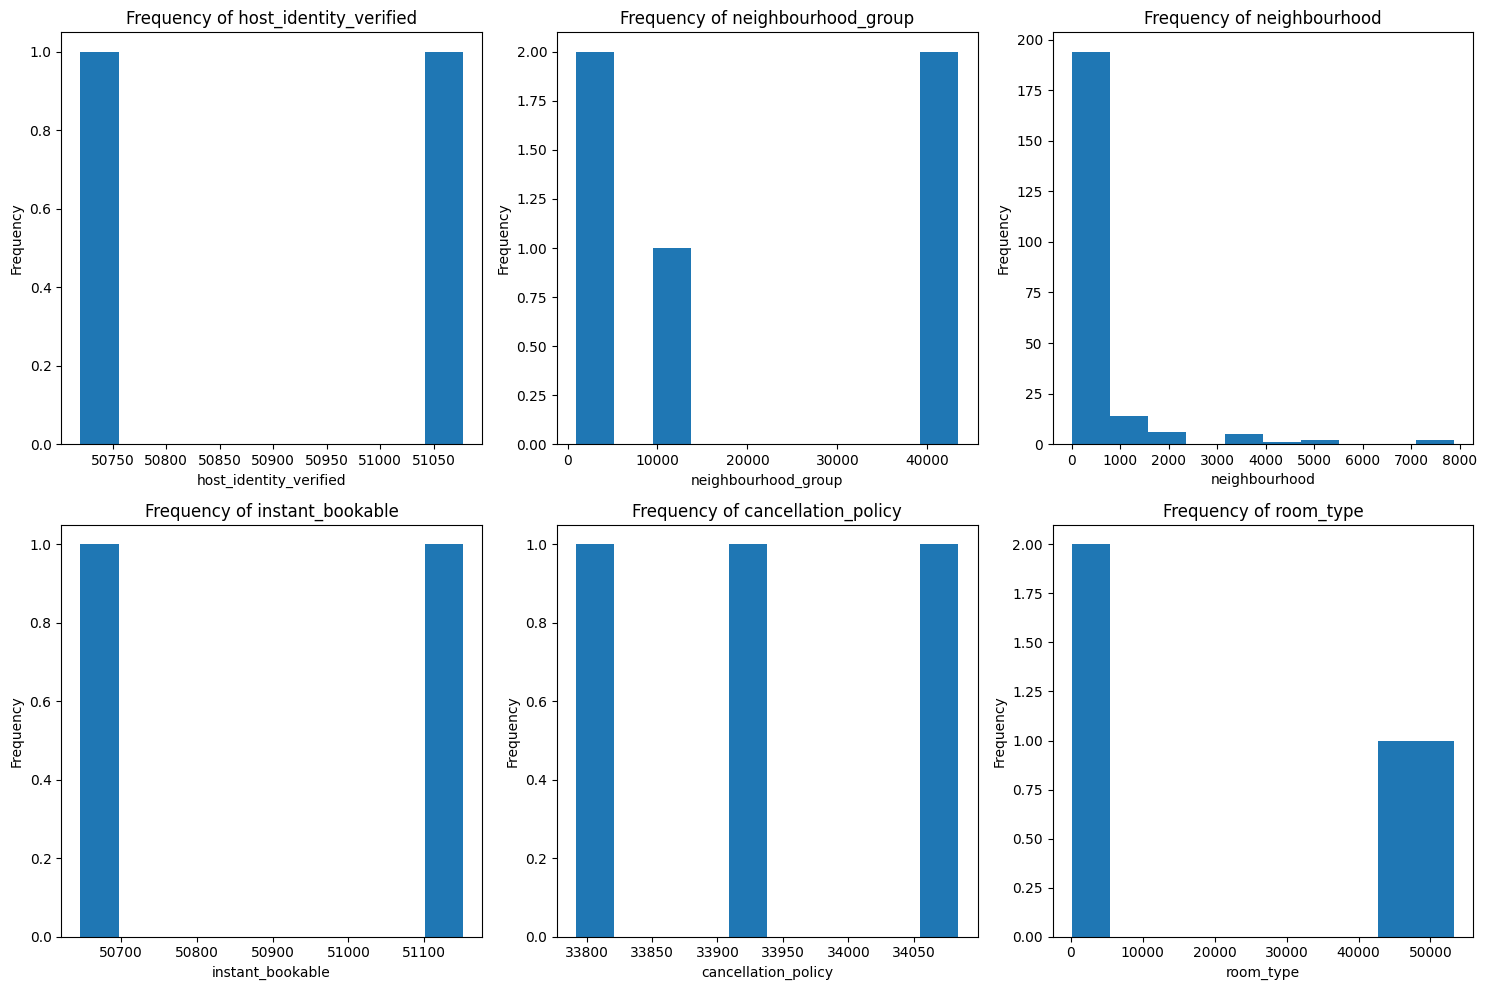

In [242]:
# Generate frequency distributions dictionary
freq_distributions = generate_frequency_distributions(df, include_bool=True)
# Histogram plot
plot_frequency_grid(freq_distributions, cols_per_row=3, chart_type='hist')

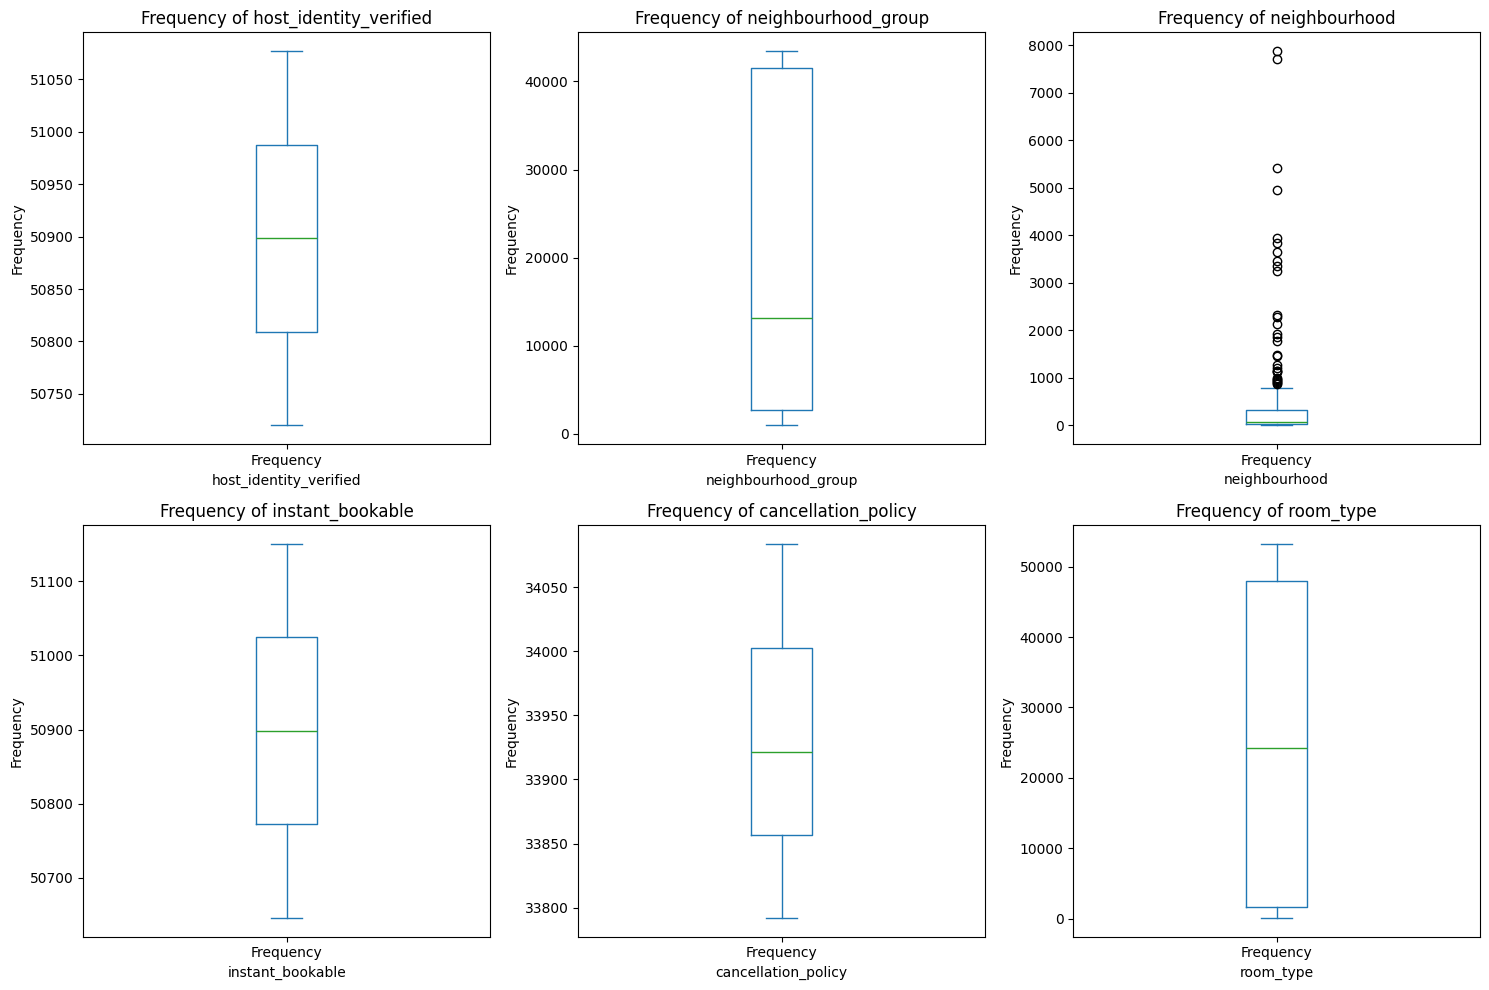

In [243]:
# Box plot
plot_frequency_grid(freq_distributions, cols_per_row=3, chart_type='box')

*   Segment the data by relevant categories (e.g., by group, region) to identify trends.
  - Analyze average price of each `neighbourhood_group`

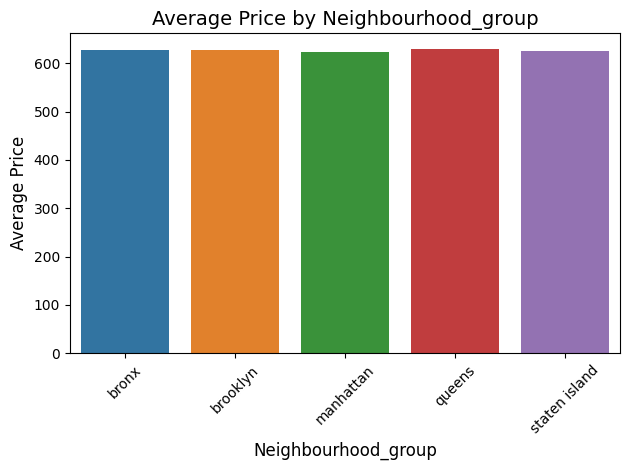

,neighbourhood_group,Average Price,Median Price,Price Std Dev
0,bronx,628.011712,633.000000,323.398928
1,brooklyn,626.484722,626.000000,331.590650
2,manhattan,622.672623,622.000000,330.878668
3,queens,630.405520,628.793220,333.669537
4,staten island,624.490078,628.000000,325.214375


In [244]:
# Analyze the relationship between price and neighbourhood_group by diagram and table
group_price_analysis(df, 'neighbourhood_group')

**Analysis Results:**
1. **Highest Average Price:**
   - **Queens** has the highest average price at **$630.405520** per night.
   - This suggests that **Queens** might have more expensive listings or services.

2. **Lowest Average Price:**
   - **Staten Island** has the lowest average price at **$624.490078** per night.
   - This may indicate that **Staten Island** offers more budget-friendly options.

3. **Other Areas:**
   - **Bronx**: Average price is **628.011712**, relatively higher than most areas.
   - **Brooklyn**: Average price is **626.484722**, similar to **Bronx**.
   - **Manhattan**: Average price is **622.676223**, lower than most areas but slightly above **Staten Island**.

**Trend Summary:**
1. The average prices across the groups are relatively close (within a range of 6–8 units), showing no extreme outliers in pricing.
2. **Queens** has a slightly higher average price, potentially due to more high-end listings in the area.
3. **Staten Island** stands out as having the lowest average price, which may reflect lower demand or more affordable housing options.

*   Segment the data by relevant categories (e.g., by group, region) to identify trends.
  - Analyze average price of each `neighbourhood_group` and `construction_year_group`

<Figure size 640x480 with 0 Axes>

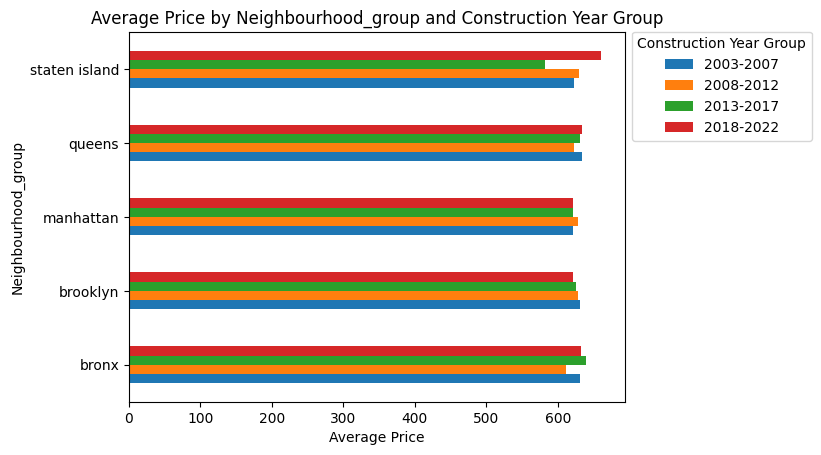

construction_year_group,2003-2007,2008-2012,2013-2017,2018-2022
neighbourhood_group,,,,
bronx,630.347926,610.705060,638.916783,632.278833
brooklyn,631.057711,628.391976,625.702936,620.831991
manhattan,621.064603,628.143853,620.634436,620.789619
queens,633.214517,622.866328,630.959688,634.446499
staten island,622.650682,629.072000,582.381910,660.743687


In [245]:
# Analyze the relationship between price and neighbourhood_group and building age by diagram and table
group_year_price_analysis(df, 'neighbourhood_group')

**Analysis Result:**
1. **Bronx:**
   - Prices increase over time, peaking in the latest `2018–2022` group (**$632.27**).
   - Indicates newer constructions in the Bronx may be driving prices up.

2. **Brooklyn:**
   - Prices steadily rise across the years, with the highest in the `2018–2022` group (**$632.83**).
   - Suggests Brooklyn maintains consistent demand for newer constructions.

3. **Manhattan:**
   - Prices stay relatively stable across all years, with minor variation.
   - Reflects a mature and highly competitive market, with little dependency on construction year.

4. **Queens:**
   - Steady increase in prices, peaking in the latest `2018–2022` group (**$634.44**).
   - Queens has the highest average price for newer constructions among all groups.

5. **Staten Island:**
   - Prices show a slight decline in the `2013–2017` group but recover strongly in the `2018–2022` group (**$664.74**).
   - Highlights fluctuating demand but high value for the newest constructions.

**Trend Summary:**
1. **General Trend:**
   - Most neighborhoods show increasing prices for newer construction years, indicating higher market value for recent builds.
   - The exception is Manhattan, where prices remain consistent, showing less influence of construction year on value.

2. **Highest Demand for New Constructions:**
   - Staten Island leads with the highest prices in the `2018–2022` group, suggesting increased interest or limited supply of newer listings there.

3. **Price Stability:**
   - Manhattan’s consistency highlights a saturated or well-established market where construction year matters less.

*   Segment the data by relevant categories (e.g., by group, region) to identify trends.
  - Analyze average price of each `room_type`

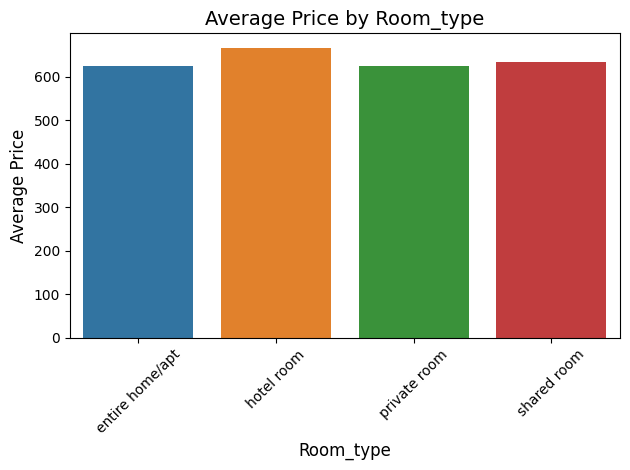

,room_type,Average Price,Median Price,Price Std Dev
0,entire home/apt,625.232564,624.210796,331.290203
1,hotel room,666.391304,643.000000,311.419689
2,private room,625.016092,623.000000,331.011432
3,shared room,634.729245,651.000000,337.930443


In [246]:
# Analyze the relationship between price and room_type by diagram and table
group_price_analysis(df, 'room_type')

Missing Analyze Result, GPT reachs limit.

# **Diagnostic Analytics**


*   Perform correlation analysis to assess relationships between numerical variables.
*   Use cross-tabulation to examine relationships between categorical variables.
*   Conduct regression analysis to investigate dependencies between variables.
*   Perform statistical testing to determine significant factors.
*   Explain the findings and provide insights into why certain trends or relationships exist.

# **Predictive Analytics**


*   Select key variables to include in your predictive model.
*   Split the data into training and testing sets for model validation.
*   Build and train three different predictive models.
*   Test the models' accuracy and evaluate the performance.
*   Interpret and explain the predictions and their real-world applications.